In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [13]:
df = pd.read_csv("C:/Users/as316/AppData/Local/Programs/Python/Python310/Scripts/.ipynb_checkpoints/Diwali Sales Data.csv", encoding='latin1')

In [14]:
df.shape

(11251, 15)

In [15]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [17]:
df.drop(['Status','unnamed1'], axis=1 , inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [9]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [21]:
df.shape

(11239, 13)

In [22]:
df.dropna(inplace=True)

In [23]:
df['Amount']=df['Amount'].astype('int')

In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Gender

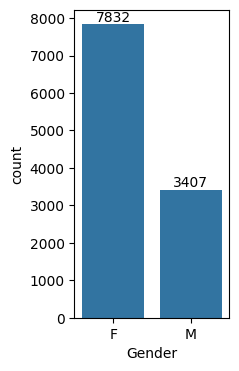

In [34]:
plt.figure(figsize=(2,4))
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [29]:
df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

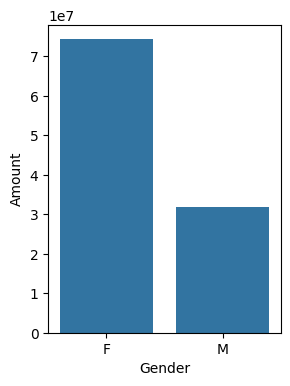

In [33]:
plt.figure(figsize=(3,4))
sales_gen=df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data = sales_gen)

# Age

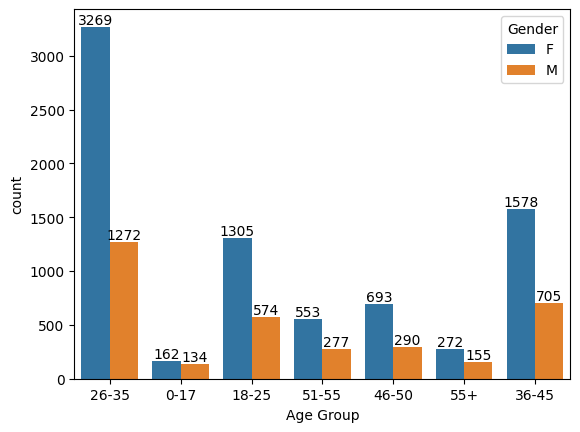

In [35]:
ax=sns.countplot(data=df,x='Age Group', hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

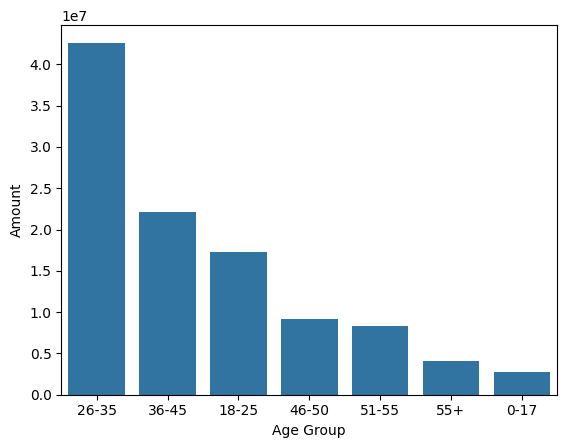

In [36]:
sales_age=df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data = sales_age)

# states

<Axes: xlabel='State', ylabel='Orders'>

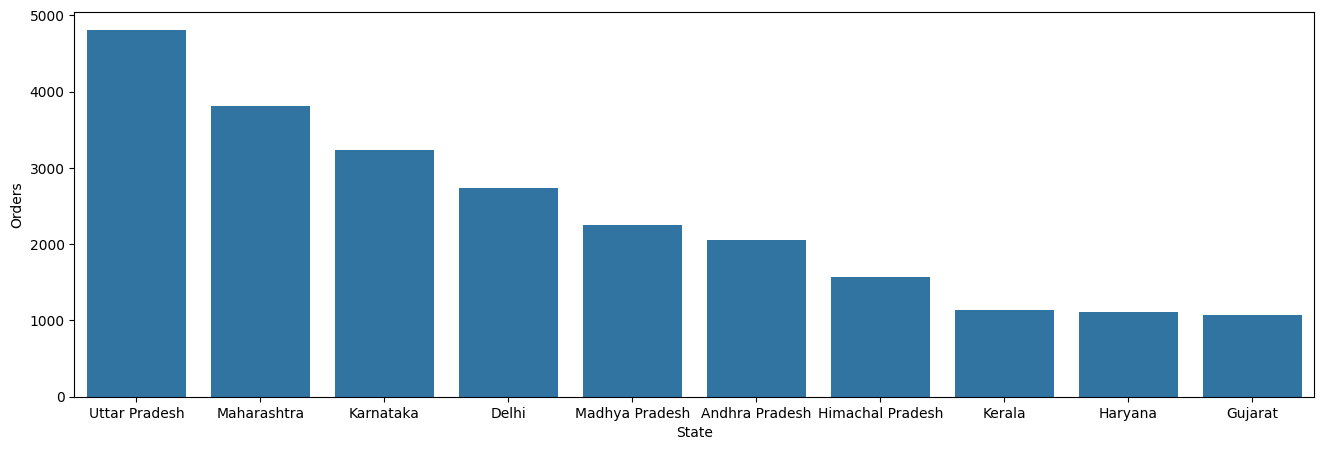

In [37]:
sales_state=df.groupby(['State'],as_index = False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
plt.figure(figsize=(16,5))
sns.barplot(data=sales_state,x='State',y='Orders')

<Axes: xlabel='State', ylabel='Amount'>

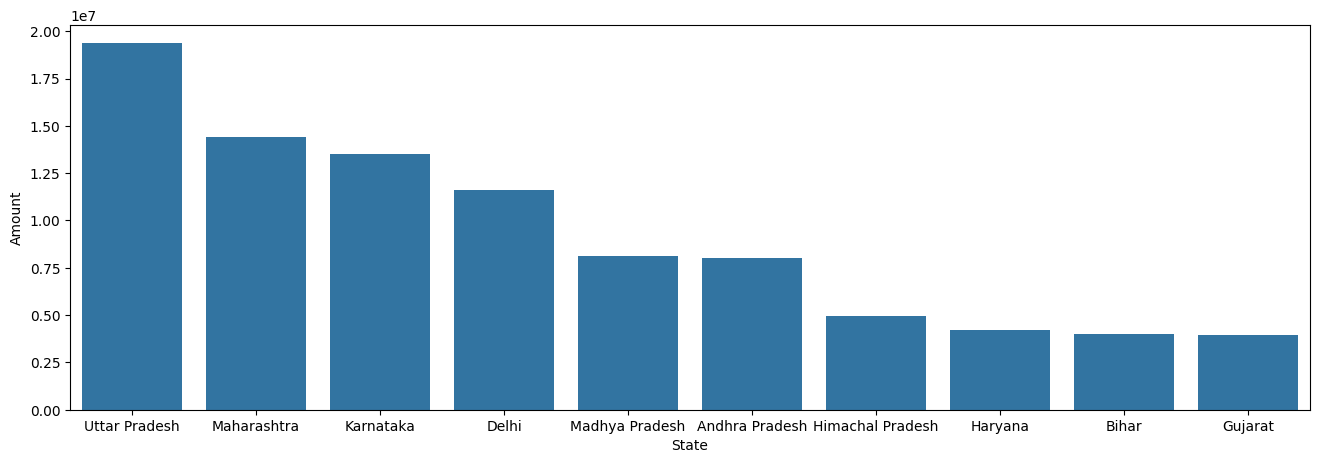

In [38]:
sales_state=df.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
plt.figure(figsize=(16,5))
sns.barplot(data=sales_state,x='State',y='Amount')

# Marital Status

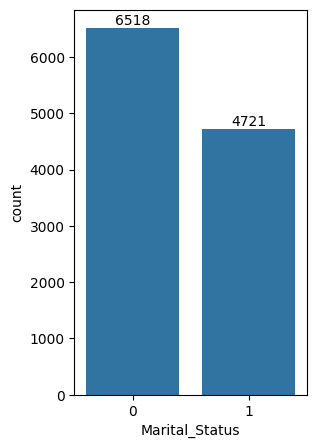

In [39]:
plt.figure(figsize=(3,5))
ax=sns.countplot(data=df,x='Marital_Status')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

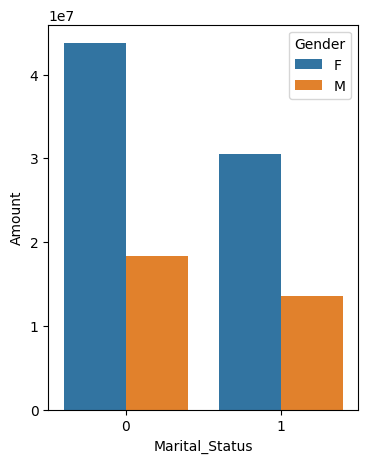

In [40]:
sales_state=df.groupby(['Marital_Status','Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(4,5))
sns.barplot(data=sales_state,x='Marital_Status',y='Amount',hue='Gender')

# Occupation

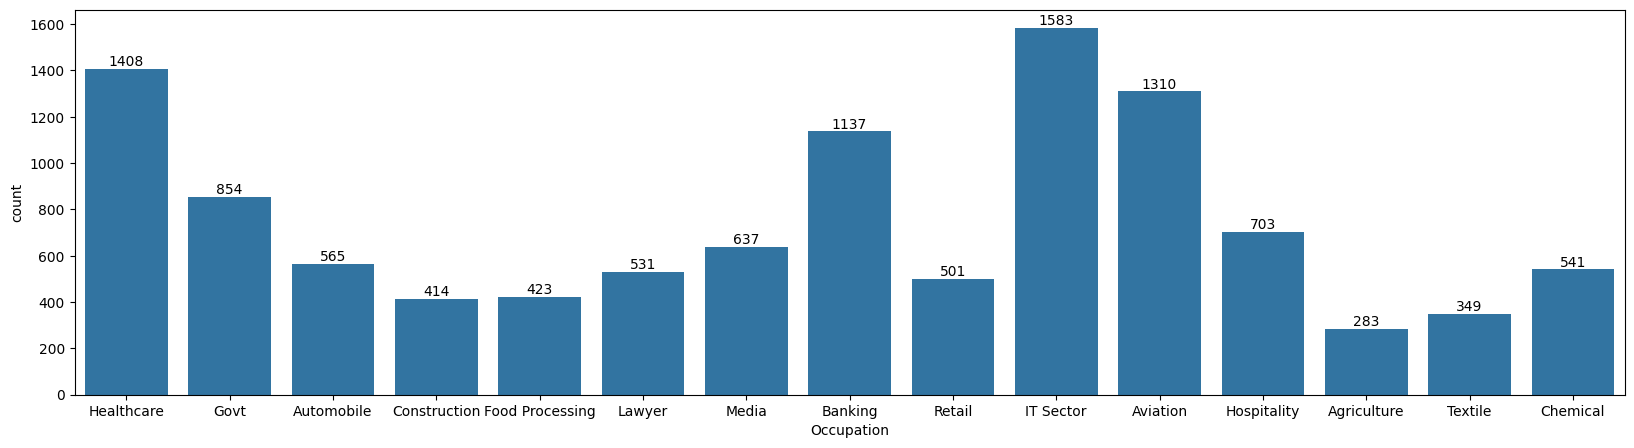

In [41]:
plt.figure(figsize=(20,5))
ax=sns.countplot(data=df,x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

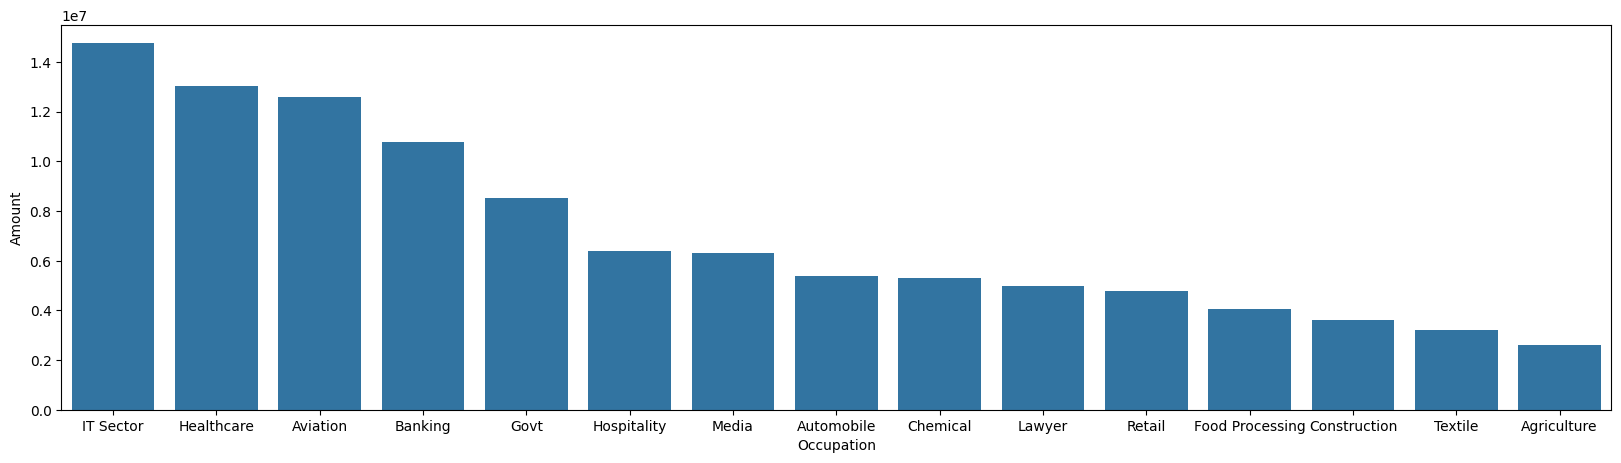

In [42]:
sales_state=df.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(data=sales_state,x='Occupation',y='Amount')

# Product Category

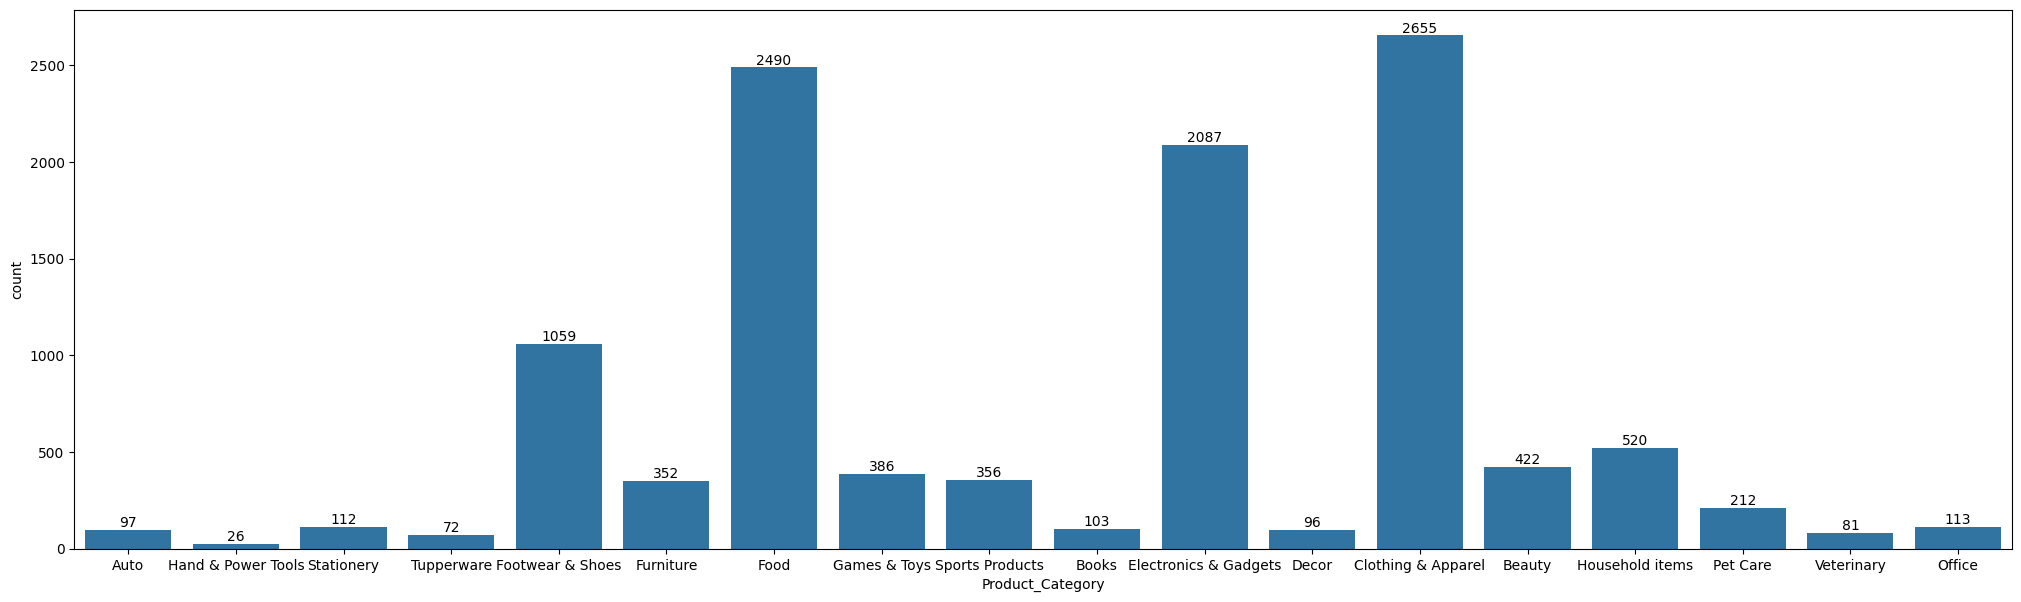

In [43]:
plt.figure(figsize=(25,7))
ax=sns.countplot(data=df,x='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

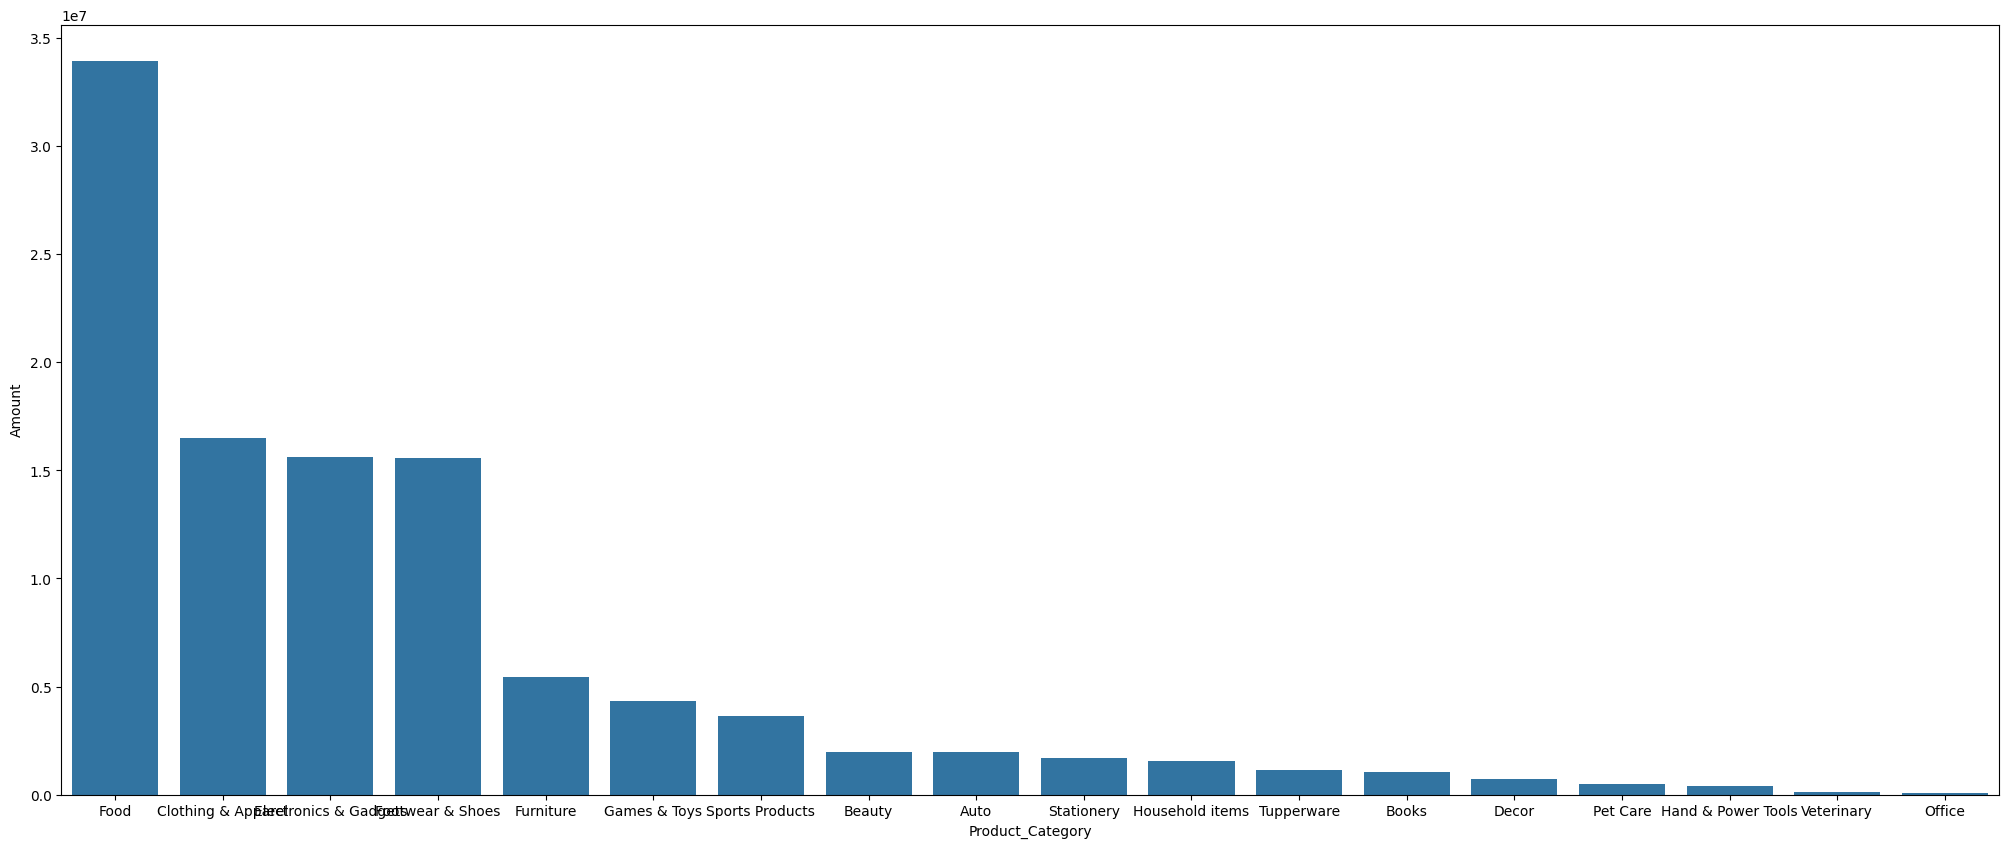

In [44]:
sales_state=df.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.figure(figsize=(25,10))
sns.barplot(data=sales_state,x='Product_Category',y='Amount')

<Axes: xlabel='Product_Category', ylabel='Orders'>

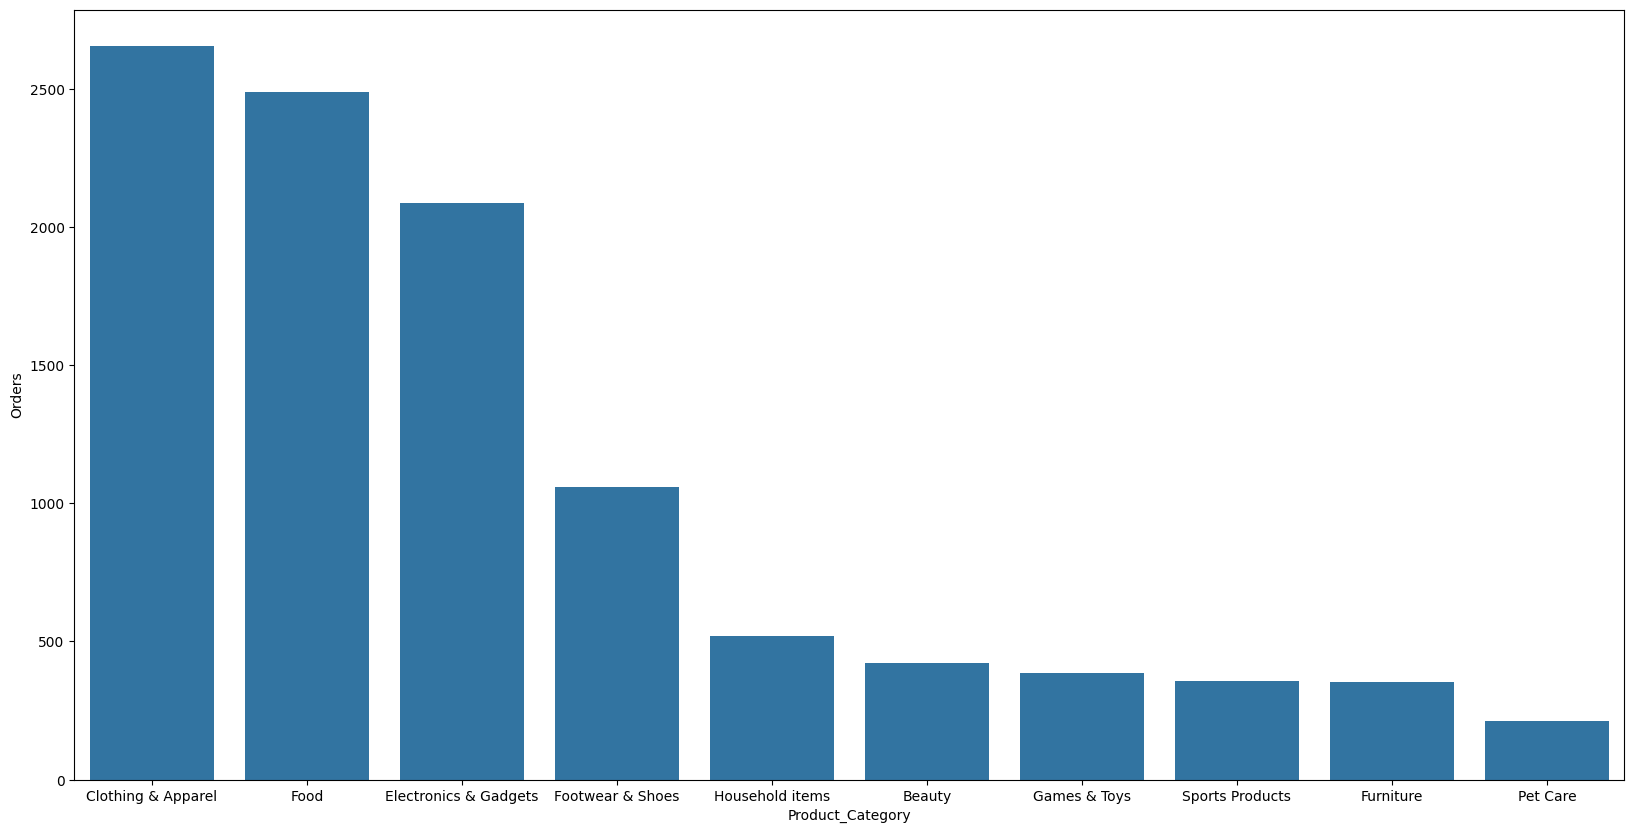

In [46]:
sales_state=df.groupby(['Product_Category'],as_index = False)['Orders'].count().sort_values(by='Orders',ascending=False).head(10)
plt.figure(figsize=(20,10))
sns.barplot(data=sales_state,x='Product_Category',y='Orders')